In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
y_train[0].shape

(1,)

In [ ]:
def plot_sample(index):
  plt.figure(figsize = (10,1))
  plt.imshow(x_train[index])

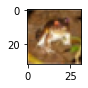

In [ ]:
plot_sample(0)

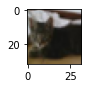

In [ ]:
plot_sample(9)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
y_train[3]

array([4], dtype=uint8)

In [ ]:
classes[y_train[3][0]]

'deer'

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
#one hot encoding
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10,dtype='float32'
)

y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10,dtype='float32'
)

y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',   #because of one hot encoding
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8092 - accuracy: 0.3548
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6211 - accuracy: 0.4273
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5410 - accuracy: 0.4567
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4787 - accuracy: 0.4788
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4321 - accuracy: 0.4951
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3891 - accuracy: 0.5109
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3502 - accuracy: 0.5252
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3148 - accuracy: 0.5406
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2840 - accuracy: 0.5479
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.253

In [ ]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.7960 - accuracy: 0.5335


[1.7959917783737183, 0.5335000157356262]

In [ ]:
np.argmax(model.predict(x_test_scaled)[0])

array([5.8290374e-02, 3.7098783e-01, 9.0690666e-01, 9.9601066e-01,
       8.6569369e-01, 9.8390365e-01, 2.1806598e-01, 2.9096118e-04,
       8.8314033e-01, 3.9491275e-01], dtype=float32)

In [ ]:
classes[y_test[0][0]]

'cat'

In [ ]:
def get_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
  ])

  model.compile(optimizer='SGD',
              loss='categorical_crossentropy',   #because of one hot encoding
              metrics=['accuracy'])
  return model